## Tugas Tanggal 14 Maret 2022 : Lakukan EDA terhadap dataset Bank Churn

    SANTI OKTAVIANI
    RAGNAROK
 ***

In [116]:
#mengimpor library data processing
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

#plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [117]:
#membaca dataset dari file Bank Churn.csv

bank = pd.read_csv('bank_churn.csv')
bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [118]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
bank['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Data Cleaning

In [120]:
bank.duplicated().sum()

0

In [121]:
bank=bank.drop(['Balance','EstimatedSalary'],axis=1)

In [122]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,1,1,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,1,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,3,1,0,1
3,4,15701354,Boni,699,France,Female,39,1,2,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,1,1,1,0


### Exploratory Data Ananlysis

In [123]:
#Melihat data

bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,1,1,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,1,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,3,1,0,1
3,4,15701354,Boni,699,France,Female,39,1,2,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,1,1,1,0


In [124]:
#bentuk data, dimana outputnya berupa (banyaknya baris, banyaknya kolom)

bank.shape

(10000, 12)

In [125]:
#mencari null count

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RowNumber       10000 non-null  int64 
 1   CustomerId      10000 non-null  int64 
 2   Surname         10000 non-null  object
 3   CreditScore     10000 non-null  int64 
 4   Geography       10000 non-null  object
 5   Gender          10000 non-null  object
 6   Age             10000 non-null  int64 
 7   Tenure          10000 non-null  int64 
 8   NumOfProducts   10000 non-null  int64 
 9   HasCrCard       10000 non-null  int64 
 10  IsActiveMember  10000 non-null  int64 
 11  Exited          10000 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 937.6+ KB


In [126]:
#mengecek nilai null

bank.isnull().sum()

RowNumber         0
CustomerId        0
Surname           0
CreditScore       0
Geography         0
Gender            0
Age               0
Tenure            0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
Exited            0
dtype: int64

In [127]:
#analisis deskriptif

bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,1.530200,0.70550,0.515100,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,0.581654,0.45584,0.499797,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.00000,1.000000,1.000000


### Analisis Univariate

In [128]:
bank["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [129]:
#membagi data

France = bank.loc[bank['Geography'] == "France"]
Spain = bank.loc[bank['Geography'] == "Spain"]
Germany = bank.loc[bank['Geography'] == "Germany"]

In [130]:
Spain.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,1,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,1,1,1,0
5,6,15574012,Chu,645,Spain,Male,44,8,2,1,0,1
11,12,15737173,Andrews,497,Spain,Male,24,3,2,1,0,0
14,15,15600882,Scott,635,Spain,Female,35,7,2,1,1,0


In [131]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

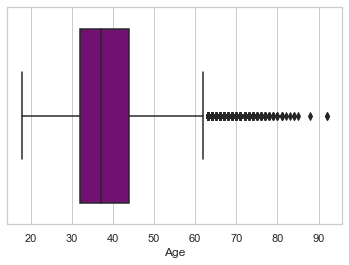

In [132]:
#plotting the boxplot

sns.boxplot(x = bank['Age'], color='purple')

<AxesSubplot:xlabel='Age', ylabel='Density'>

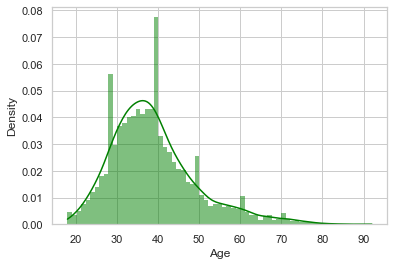

In [133]:
#plotting the KDE

sns.histplot(data=bank['Age'],  color="green", kde=True, stat="density", linewidth=0) 

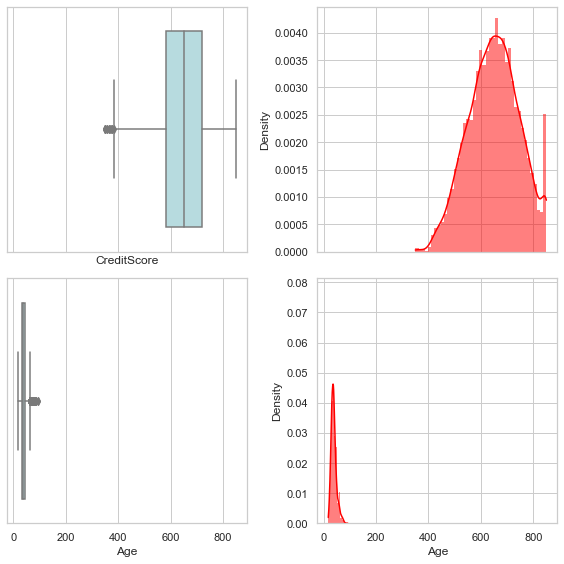

In [142]:
f,axis=plt.subplots(ncols=2, nrows=2, figsize=(8,8), sharex=True)

column=['CreditScore', 'Age']
for i in range(2):
    
    #Ploting the boxplot
    sns.boxplot(x = bank[column[i]], ax=axis[i][0], color='powderblue')
    
    # Ploting the KDE
    sns.histplot(data=bank[column[i]], ax=axis[i][1],  color="red", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()

<AxesSubplot:xlabel='Geography', ylabel='count'>

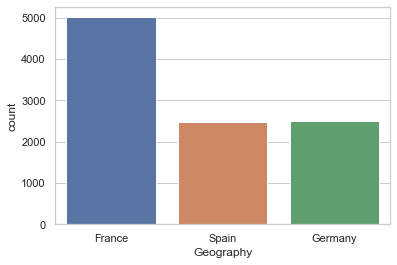

In [140]:
sns.countplot(x=bank['Geography'])

### Analisis Data Bivariate

#### Creditcore vs Geography

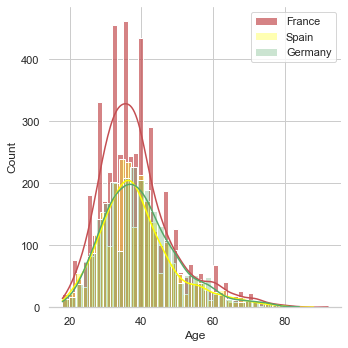

In [148]:
# Set up the matplotlib figure
f, axis = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #CreditScore-vs-Geography

# Ploting the histogram with KDE

sns.histplot(data=France["Age"],label="France",color='r',kde=True,linewidth=1,alpha=0.7)
sns.histplot(data=Spain["Age"],label="Spain",kde=True,color='yellow',linewidth=1,alpha=0.3)
sns.histplot(data=Germany["Age"],label="Germany",kde=True,color='g',linewidth=1,alpha=0.3)

plt.legend()
plt.tight_layout()

#### Age vs Geography

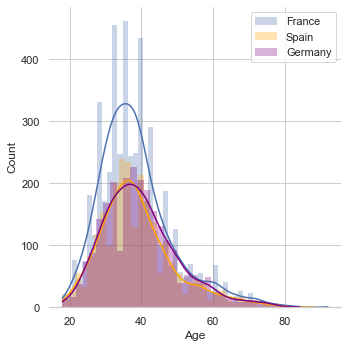

In [151]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=France["Age"],label="France",color='b',kde=True,linewidth=0,alpha=0.3)
sns.histplot(data=Spain["Age"],label="Spain",kde=True,color='orange',linewidth=0,alpha=0.3)
sns.histplot(data=Germany["Age"],label="Germany",kde=True,color='purple',linewidth=0,alpha=0.3)

plt.legend()
plt.tight_layout()

### Analisis Multivariat

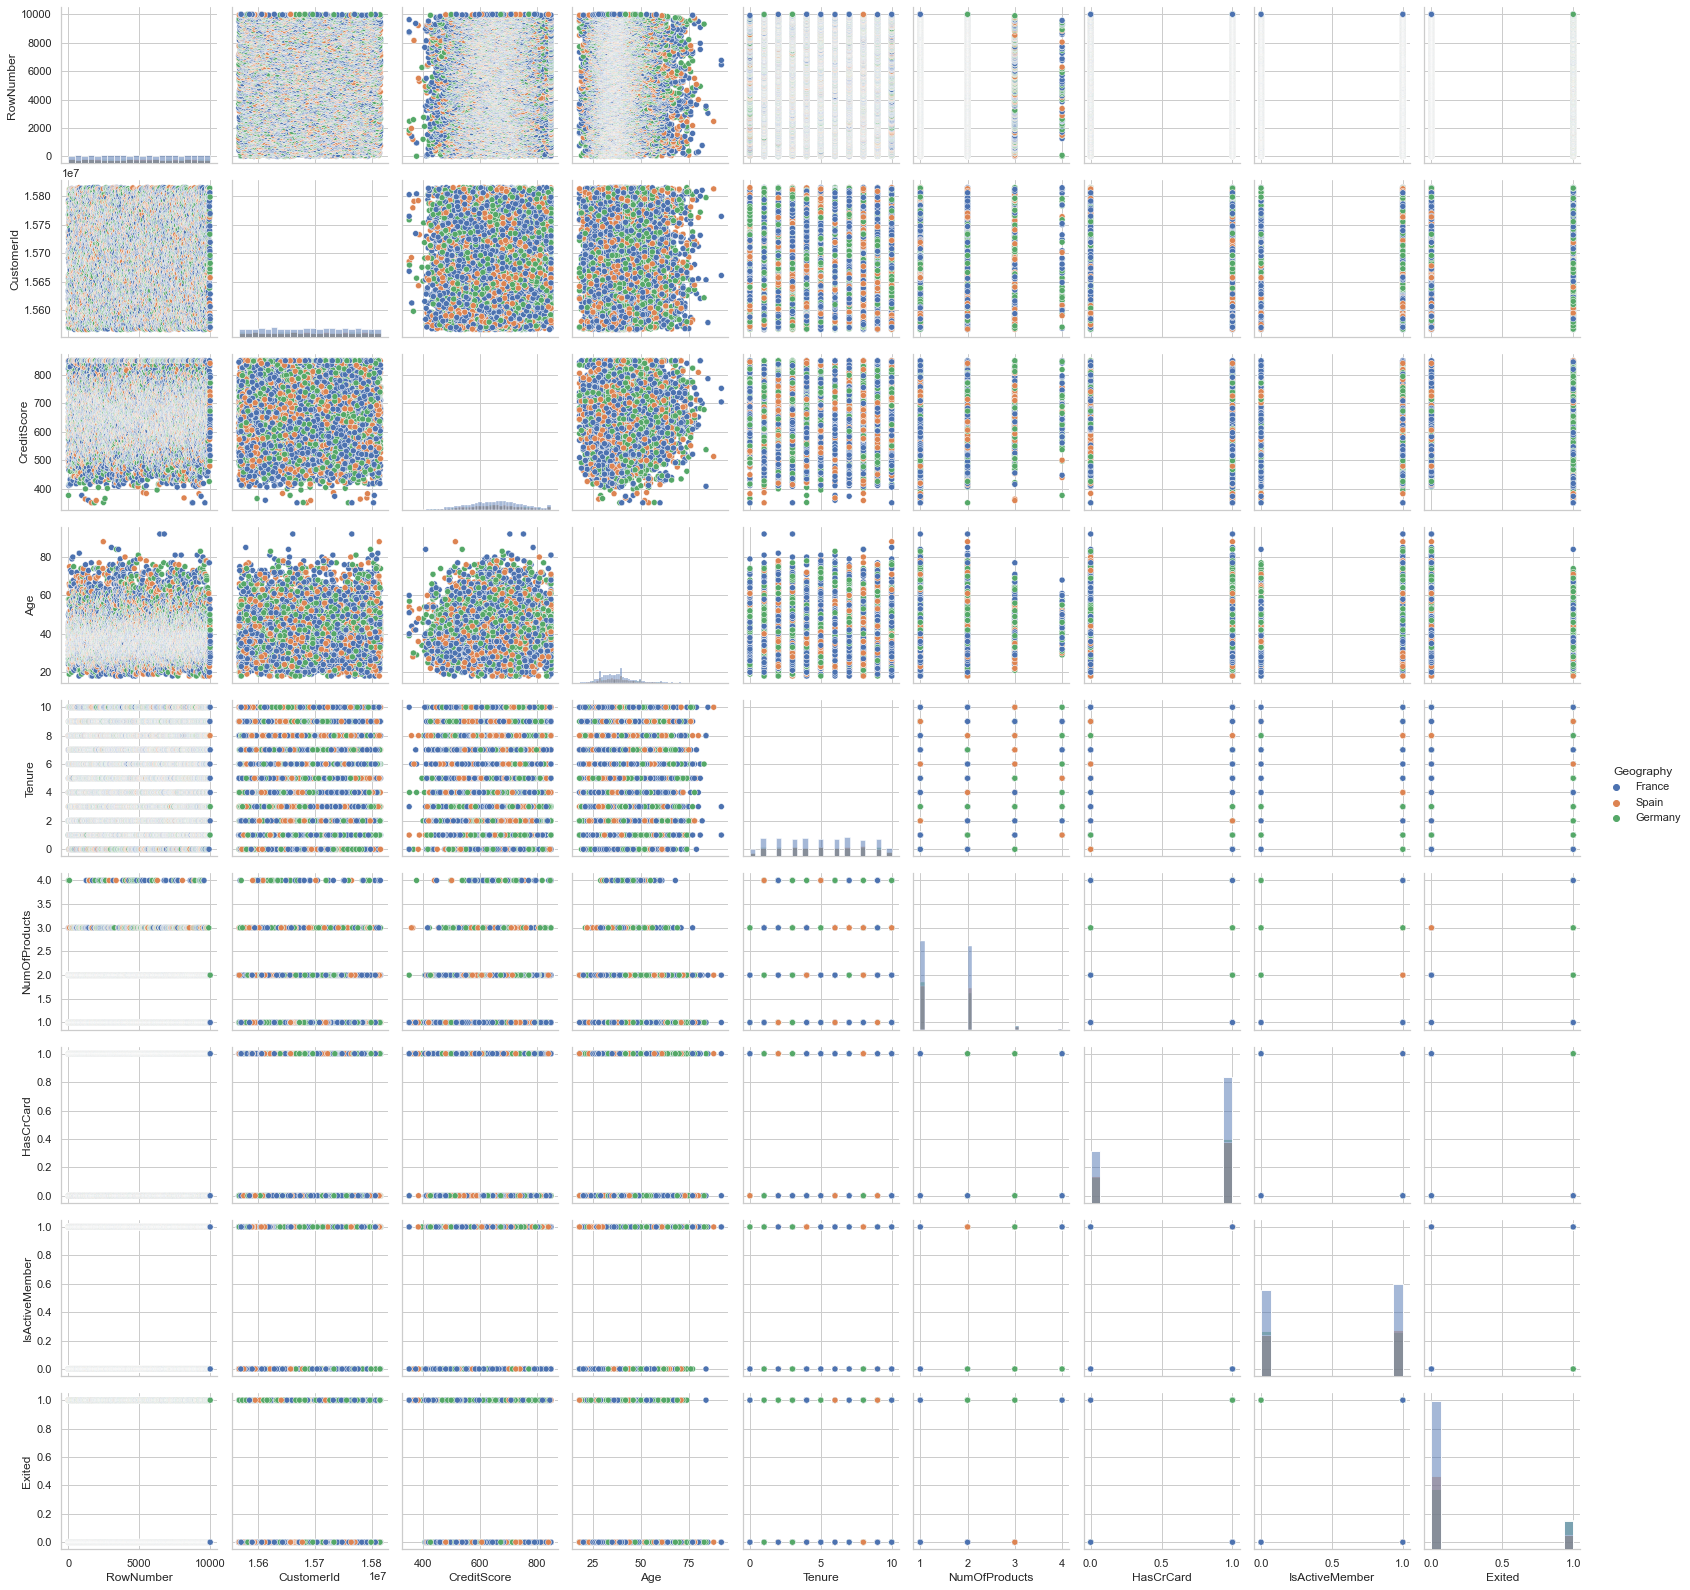

In [162]:
sns.pairplot(bank, hue="Geography", diag_kind="hist")
plt.show()